<a href="https://colab.research.google.com/github/Xemarij/Computer-Vision/blob/main/8_Convolutions%2C_Blurring_and_Sharpening_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Convolutions, Blurring and Sharpening Images**

####**In this lesson we'll learn:**
1. Convolution Operations
2. Blurring
3. Denoising
4. Sharpening

### **Blurring using Convolutions**

**Using Python cv2 give code to blurr an image using convolution and display the image using matplotlib.**

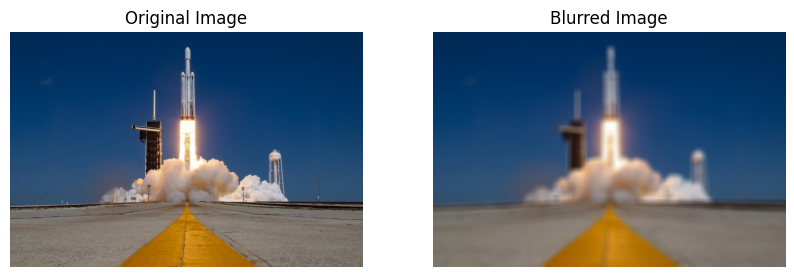

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('./images/4.jpg')

# Convert the image from BGR to RGB (OpenCV loads images in BGR format by default)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Define the kernel for blurring (a 5x5 averaging kernel)
kernel = np.ones((25, 25), np.float32) / 625

# Apply the convolution using the filter2D function
blurred_image = cv2.filter2D(image_rgb, -1, kernel)

# Display the original and blurred images side by side
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")

# Blurred image
plt.subplot(1, 2, 2)
plt.imshow(blurred_image)
plt.title("Blurred Image")
plt.axis("off")

# Show the images
plt.show()


### **Other commonly used blurring methods in OpenCV**
- Regular Blurring
- Gaussian Blurring
- Median Blurring

**Use the Python cv2 blur function to blurr the image and display the image using matplotlib.**

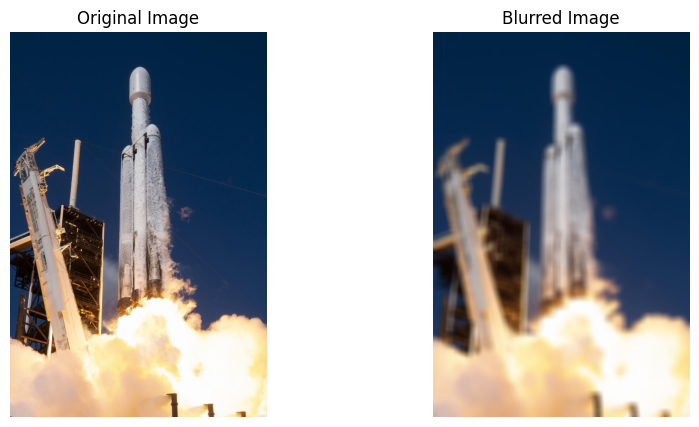

In [7]:
#Regular Blurring
import cv2
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('./images/5.jpg')

# Convert the image from BGR to RGB format
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Apply blurring with a 5x5 kernel
blurred_image = cv2.blur(image_rgb, (26, 26))

# Display the original and blurred images side by side
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")

# Blurred image
plt.subplot(1, 2, 2)
plt.imshow(blurred_image)
plt.title("Blurred Image")
plt.axis("off")

# Show the images
plt.show()

**Use Python cv2 apply Gussian blurring on an image and use matplotlib to display the image.**

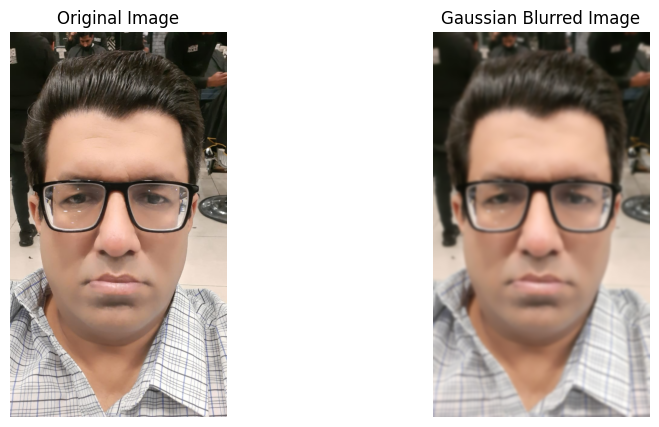

In [9]:
#Gussian Blurring
import cv2
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('./images/Tauqeer Khurram.jpg')

# Convert the image from BGR to RGB format
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Apply Gaussian blurring with a 5x5 kernel
blurred_image = cv2.GaussianBlur(image_rgb, (25, 25), 0)

# Display the original and blurred images side by side
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")

# Blurred image
plt.subplot(1, 2, 2)
plt.imshow(blurred_image)
plt.title("Gaussian Blurred Image")
plt.axis("off")

# Show the images
plt.show()


**Use Python cv2 apply Median blurring on an image nad use matplotlib to display the image.**

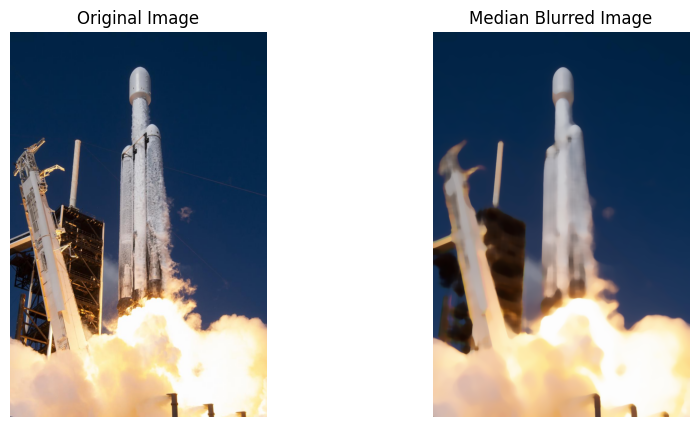

In [11]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('./images/5.jpg')

# Convert the image from BGR to RGB format
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Apply median blurring with a kernel size of 5
blurred_image = cv2.medianBlur(image_rgb, 25)

# Display the original and blurred images side by side
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")

# Blurred image
plt.subplot(1, 2, 2)
plt.imshow(blurred_image)
plt.title("Median Blurred Image")
plt.axis("off")

# Show the images
plt.show()


### **Bilateral Filter**
#### ```dst = cv.bilateralFilter(src, d, sigmaColor, sigmaSpace[, dst[, borderType]])```
- **src**	Source 8-bit or floating-point, 1-channel or 3-channel image.
- **dst**	Destination image of the same size and type as src .
- **d**	Diameter of each pixel neighborhood that is used during filtering. If it is non-positive, it is computed from sigmaSpace.
- **sigmaColor**	Filter sigma in the color space. A larger value of the parameter means that farther colors within the pixel neighborhood (see sigmaSpace) will be mixed together, resulting in larger areas of semi-equal color.
- **sigmaSpace**	Filter sigma in the coordinate space. A larger value of the parameter means that farther pixels will influence each other as long as their colors are close enough (see sigmaColor ). When d>0, it specifies the neighborhood size regardless of sigmaSpace. Otherwise, d is proportional to sigmaSpace.
- **borderType**	border mode used to extrapolate pixels outside of the image

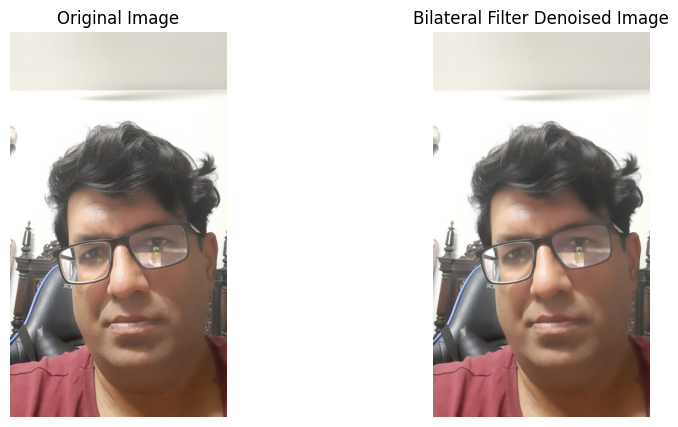

In [12]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('./images/Tauqeer.jpg')

# Convert the image from BGR to RGB format
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Apply bilateral filtering effective in noise removal while keeping edges sharp
# Parameters: d (diameter of pixel neighborhood), sigmaColor, sigmaSpace
denoised_image = cv2.bilateralFilter(image_rgb, d=9, sigmaColor=75, sigmaSpace=75)

# Display the original and denoised images side by side
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")

# Denoised image
plt.subplot(1, 2, 2)
plt.imshow(denoised_image)
plt.title("Bilateral Filter Denoised Image")
plt.axis("off")

# Show the images
plt.show()


## **Image De-noising - Non-Local Means Denoising**

**There are 4 variations of Non-Local Means Denoising:**

- cv2.fastNlMeansDenoising() - works with a single grayscale images
- cv2.fastNlMeansDenoisingColored() - works with a color image.
- cv2.fastNlMeansDenoisingMulti() - works with image sequence captured in short period of time (grayscale images)
- cv2.fastNlMeansDenoisingColoredMulti() - same as above, but for color images.

```fastNlMeansDenoisingColored(InputArray src, OutputArray dst, float h=3, float hColor=3, int templateWindowSize=7, int searchWindowSize=21 )¶```

#### Parameters for fastNlMeansDenoisingColored:

- **src** – Input 8-bit 3-channel image.
- **dst** – Output image with the same size and type as src .
templateWindowSize – Size in pixels of the template patch that is used to compute weights. Should be odd. Recommended value 7 pixels
- **searchWindowSize** – Size in pixels of the window that is used to compute weighted average for given pixel. Should be odd. Affect performance linearly: greater searchWindowsSize - greater denoising time. Recommended value 21 pixels
- **h** – Parameter regulating filter strength for luminance component. Bigger h value perfectly removes noise but also removes image details, smaller h value preserves details but also preserves some noise
- **hColor** – The same as h but for color components. For most images value equals 10 will be enought to remove colored noise and do not distort colors

**Use Python cv2 Non-Local means to denoise a colored image and display the image using matplotlib.**

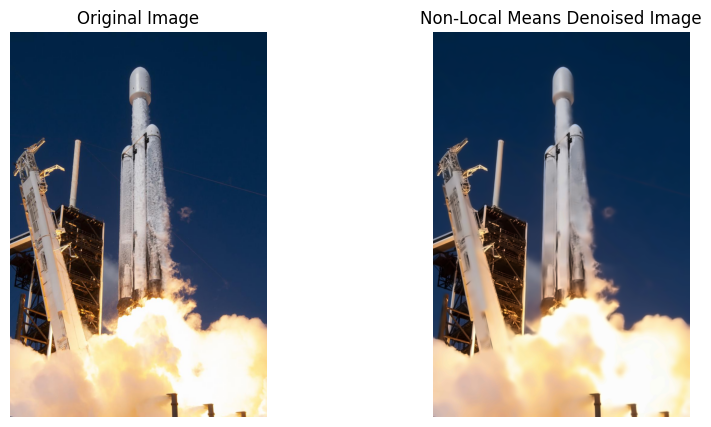

In [21]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('./images/5.jpg')

# Convert the image from BGR to RGB format
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Apply Non-Local Means Denoising
# Parameters: h (filter strength for luminance), hForColor, templateWindowSize, searchWindowSize
denoised_image = cv2.fastNlMeansDenoisingColored(image_rgb, 10, 10, 7, 21)

# Display the original and denoised images side by side
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")

# Denoised image
plt.subplot(1, 2, 2)
plt.imshow(denoised_image)
plt.title("Non-Local Means Denoised Image")
plt.axis("off")

# Show the images
plt.show()



### **Sharpening Images**

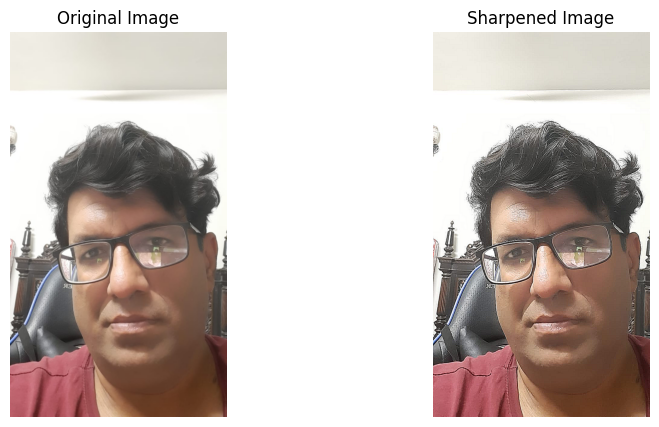

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('./images/Tauqeer.jpg')

# Convert the image from BGR to RGB format
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Define a sharpening kernel
sharpening_kernel = np.array([[-1, -1, -1],
                               [-1, 9, -1],
                               [-1, -1, -1]])

# Apply the sharpening kernel to the image
sharpened_image = cv2.filter2D(image_rgb, -1, sharpening_kernel)

# Display the original and sharpened images side by side
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")

# Sharpened image
plt.subplot(1, 2, 2)
plt.imshow(sharpened_image)
plt.title("Sharpened Image")
plt.axis("off")

# Show the images
plt.show()
